In [1]:
import pandas as pd
import numpy as np

Transaction = pd.read_excel("./KPMG.xlsx", sheetname="Transactions")
CusDemo = pd.read_excel("./KPMG.xlsx", sheetname="CustomerDemographic")
CusAdd = pd.read_excel("./KPMG.xlsx", sheetname="CustomerAddress")


In [2]:
Transaction["order_status"] = Transaction["order_status"].astype("str")
Trans1 = Transaction[Transaction["order_status"] == "Approved"]

Trans1 = Trans1.groupby(by=["customer_id"])["list_price","standard_cost"].sum().reset_index()
Trans1
Comb = Trans1.merge(CusDemo, how="inner",on=["customer_id"])[["customer_id","list_price",
                    "standard_cost","past_3_years_bike_related_purchases","job_industry_category",
                    "DOB","owns_car","gender","wealth_segment"]]
#Comb = Comb[Comb["order_status"]=="Approved"]
Comb["profit"] = Comb["list_price"] - Comb["standard_cost"]
Comb.groupby(by=["job_industry_category"])["profit",
                                           "past_3_years_bike_related_purchases"].sum().reset_index()

,job_industry_category,profit,past_3_years_bike_related_purchases
0,Argiculture,299401.10,5180
1,Entertainment,380850.74,5697
2,Financial Services,2121126.81,33097
3,Health,1639797.62,26440
4,IT,373660.97,6302
5,Manufacturing,2134704.89,34031
6,Property,691992.73,11337
7,Retail,974448.09,14847
8,Telecommunications,187229.28,2683
9,n/a,1757792.61,27669


In [3]:
Comb["age"] = 2022-Comb["DOB"].dt.year
def Get_age_group(age):
    a = age/10
    if a>=1 and a<3:
        return "10-29"
    elif a>=3 and a<4:
        return "30-39"
    elif a>=4 and a<5:
        return "40-49"
    elif a>=5 and a<6:
        return "50-59"
    elif a>=6 and a<7:
        return "60-69"
    else:
        return "70 and above"
Comb["age_group"] = Comb["age"].apply(Get_age_group)
Comb.groupby(by=["age_group","gender"])["profit"].sum().reset_index()

,age_group,gender,profit
0,10-29,F,778466.16
1,10-29,M,857400.30
2,30-39,F,923457.51
3,30-39,M,882813.17
4,40-49,F,1837282.04
5,40-49,M,1759014.47
6,50-59,F,1030290.81
7,50-59,M,871167.54
8,60-69,F,808186.99
9,60-69,M,795617.17


Text(0.5,1,'Profit for Male and Female of Different Age Groups')

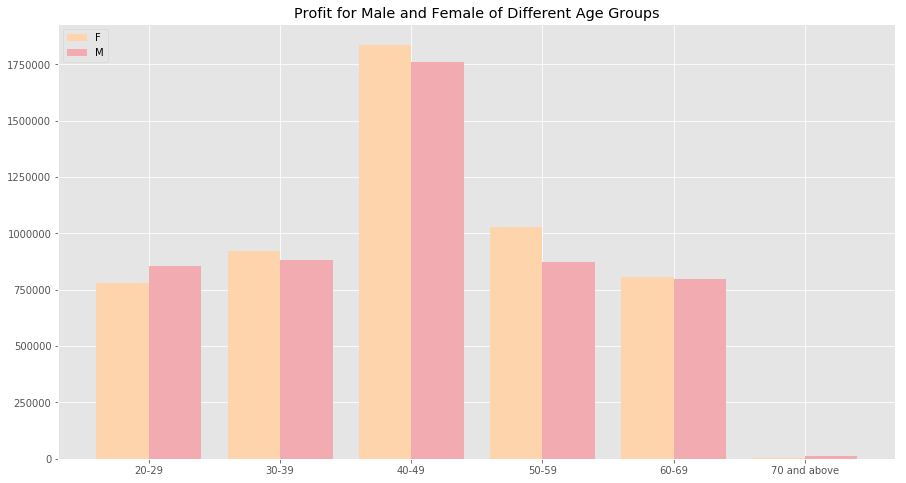

In [4]:
import matplotlib.pyplot as plt

industry = Comb.groupby(by=["job_industry_category"])["profit",
                                           "past_3_years_bike_related_purchases"].sum().reset_index()
age_gender = Comb.groupby(by=["age_group","gender"])["profit"].sum().reset_index()

c_list = ['#FDD4AC', '#F3ABB2', '#CA8EB0', '#B094C4', '#DFD4E9']
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")
bar_width = 0.4
a = ["20-29","30-39","40-49","50-59","60-69","70 and above"]

index = list(range(int(len(age_gender)/2)))
plt.bar([i-0.5*bar_width for i in index], age_gender[age_gender["gender"]=="F"]["profit"], 
        width=0.4, color=c_list[0], label="F")
plt.bar([i+0.5*bar_width for i in index], age_gender[age_gender["gender"]=="M"]["profit"], 
        width=0.4, color=c_list[1], label="M")
plt.legend(loc="upper left")
plt.xticks(index,a)
plt.title("Profit for Male and Female of Different Age Groups")

Text(0.5,1,'Profit for Male and Female of Different Age Groups')

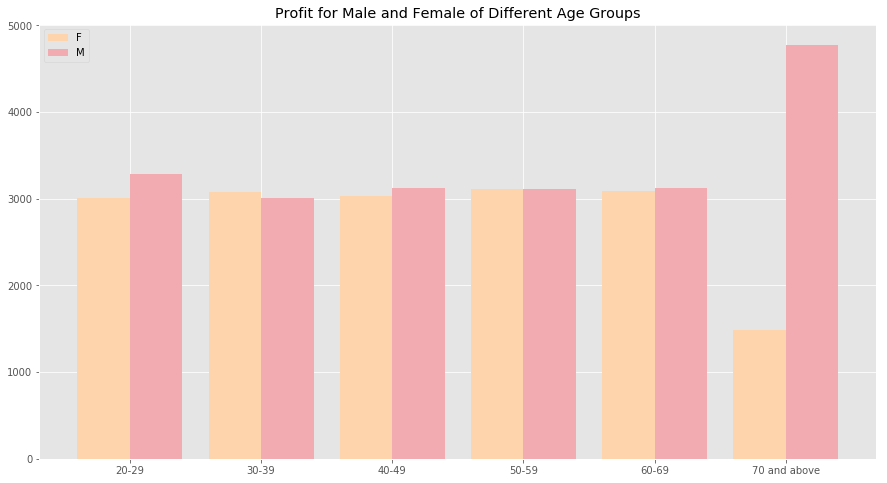

In [5]:
import matplotlib.pyplot as plt

industry = Comb.groupby(by=["job_industry_category"])["profit",
                                           "past_3_years_bike_related_purchases"].mean().reset_index()
age_gender = Comb.groupby(by=["age_group","gender"])["profit"].mean().reset_index()

c_list = ['#FDD4AC', '#F3ABB2', '#CA8EB0', '#B094C4', '#DFD4E9']
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")
bar_width = 0.4
a = ["20-29","30-39","40-49","50-59","60-69","70 and above"]

index = list(range(int(len(age_gender)/2)))
plt.bar([i-0.5*bar_width for i in index], age_gender[age_gender["gender"]=="F"]["profit"], 
        width=0.4, color=c_list[0], label="F")
plt.bar([i+0.5*bar_width for i in index], age_gender[age_gender["gender"]=="M"]["profit"], 
        width=0.4, color=c_list[1], label="M")
plt.legend(loc="upper left")
plt.xticks(index,a)
plt.title("Profit for Male and Female of Different Age Groups")

Text(0.5,1,'Total Profit for Different Industries')

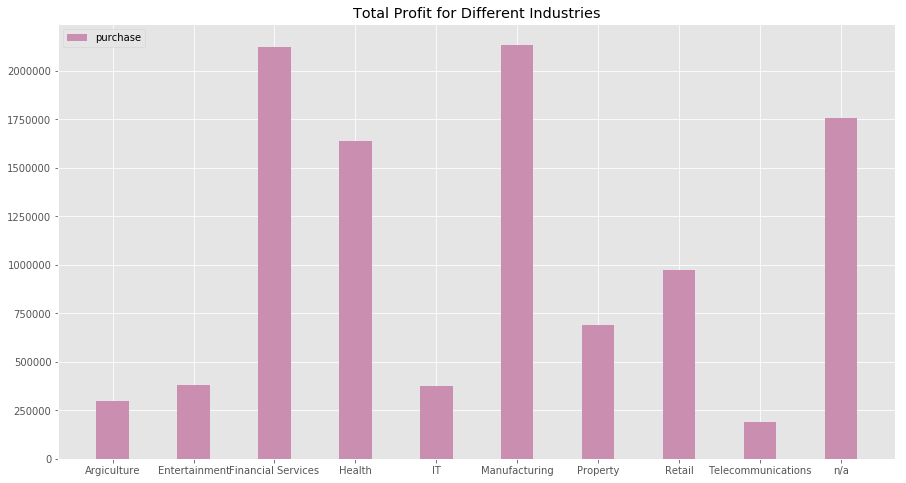

In [8]:
industry = Comb.groupby(by=["job_industry_category"])["profit",
                                           "past_3_years_bike_related_purchases"].sum().reset_index()

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")
bar_width = 2
b = list(industry["job_industry_category"])

index = list(range(int(len(industry))))
plt.bar([i for i in index], industry["profit"], 
        width=0.4, color=c_list[2], label="purchase")
# plt.bar([i+0.5*bar_width for i in index], age_gender[age_gender["gender"]=="M"]["profit"], 
#         width=0.4, color=c_list[1], label="M")
plt.legend(loc="upper left")
plt.xticks(index,b)
plt.title("Total Profit for Different Industries")

In [9]:
Comb.groupby(by=["job_industry_category"])["profit",
                                           "past_3_years_bike_related_purchases"].count().reset_index()

,job_industry_category,profit,past_3_years_bike_related_purchases
0,Argiculture,100,100
1,Entertainment,123,123
2,Financial Services,680,680
3,Health,526,526
4,IT,127,127
5,Manufacturing,700,700
6,Property,231,231
7,Retail,304,304
8,Telecommunications,63,63
9,n/a,561,561


Text(0.5,1,'Profit for Different Industries')

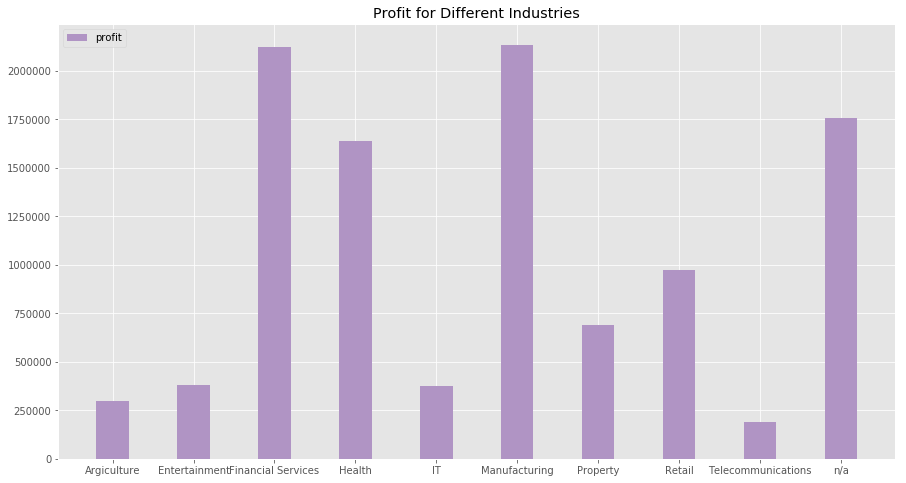

In [13]:
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")
bar_width = 0.8
b = list(industry["job_industry_category"])

index = list(range(int(len(industry))))
plt.bar([i for i in index], industry["profit"], 
        width=0.4, color=c_list[3], label="profit")
# plt.bar([i+0.5*bar_width for i in index], age_gender[age_gender["gender"]=="M"]["profit"], 
#         width=0.4, color=c_list[1], label="M")
plt.legend(loc="upper left")
plt.xticks(index,b)
plt.title("Total Profit for Different Industries")

Text(0.5,1,'Profit for Car Owners of Different VIP Level')

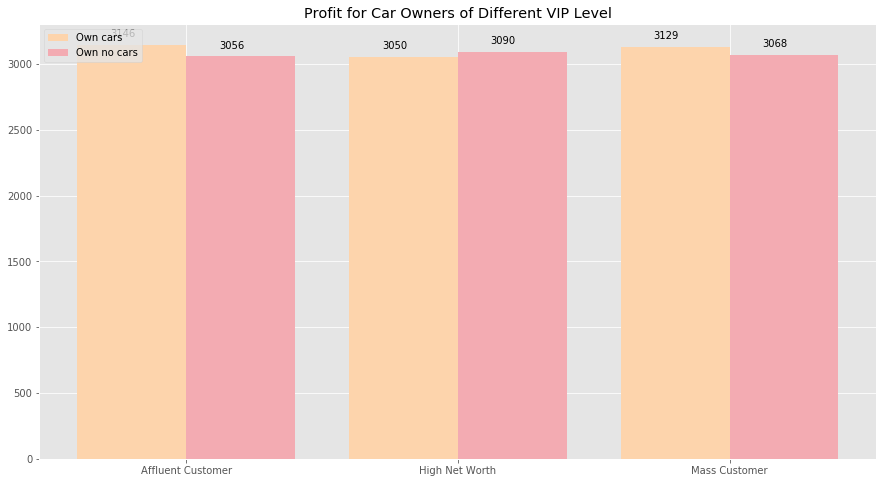

In [24]:
VIP_car = Comb.groupby(by=["owns_car","wealth_segment"])["profit",
                        "past_3_years_bike_related_purchases"].mean().reset_index()

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")
bar_width = 0.4
c = list(VIP_car["wealth_segment"])
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.08, 1.02*height, '%s' % int(height), size=10)


index = list(range(int(len(VIP_car)/2)))
cm = plt.bar([i-0.5*bar_width for i in index], VIP_car[VIP_car["owns_car"]=="Yes"]["profit"], 
        width=0.4, color=c_list[0], label="Own cars")
autolabel(cm)
cm = plt.bar([i+0.5*bar_width for i in index], VIP_car[VIP_car["owns_car"]=="No"]["profit"], 
        width=0.4, color=c_list[1], label="Own no cars")
autolabel(cm)
plt.legend(loc="upper left")
plt.xticks(index,c)
# plt.xlim(2000,3000)
plt.title("Profit for Car Owners of Different VIP Level")

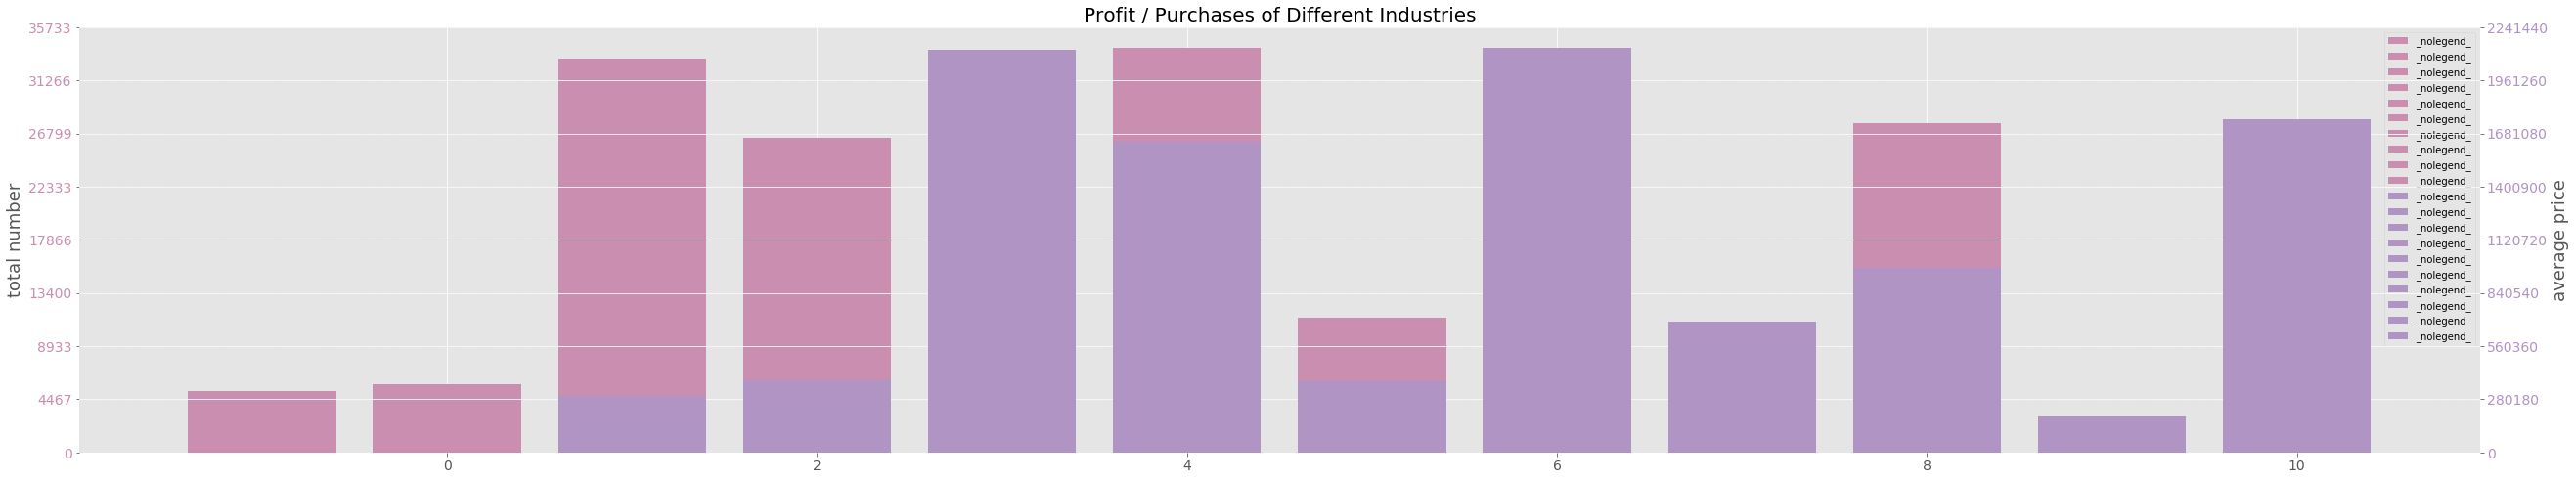

In [20]:
%matplotlib inline
bar_width = 2
b = list(industry["job_industry_category"])

index = list(range(int(len(industry))))
fig, ax1 = plt.subplots(figsize=(44, 8))
plt.style.use("ggplot")
title = ('Profit / Purchases of Different Industries')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.bar([i-0.5*bar_width for i in index],industry["past_3_years_bike_related_purchases"],
                 color=c_list[2],label='number of purchases')
ax1.set_ylabel('total number', fontsize = 18)
# ax1.set_ylim(0,60000)
for tl in ax1.get_yticklabels():
    tl.set_color(c_list[2])    
ax2 = ax1.twinx()
plot2 = ax2.bar([i+0.5*bar_width for i in index],industry["profit"],color=c_list[3],label='profit')
ax2.set_ylabel('average price',fontsize=18)
# ax2.set_ylim(140,150)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color(c_list[3])                    

lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)          

In [6]:
NewCus = pd.read_excel("./KPMG.xlsx", sheetname="NewCustomerList")
NewCus["age"] = 2022-NewCus["DOB"].dt.year
NewCus["age_group"] = NewCus["age"].apply(Get_age_group)
NewCus.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,random num,one: owns car,two: properties/purchase,three: VIP level,rank,Rank,Value,sum value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,0.40,0.50,0.6250,0.53125,1,1,1.718750,10.312500,65,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,0.96,0.96,1.2000,1.02000,1,1,1.718750,18.906250,52,50-59
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,0.90,0.90,0.9000,0.90000,1,1,1.718750,8.593750,48,40-49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,0.68,0.85,0.8500,0.85000,4,4,1.703125,1.703125,43,40-49
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,0.69,0.69,0.8625,0.86250,4,4,1.703125,15.328125,57,50-59


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

NewCusData = NewCus[["Value","age_group","owns_car","gender","job_industry_category",
                    "wealth_segment","property_valuation"]]

CusDu = pd.get_dummies(NewCusData["age_group"]).iloc[:,:-1]
# 70 and above is ommitted
NewCusData = pd.merge(NewCusData,CusDu,how="outer",right_index=True,left_index=True)
CusDu = pd.get_dummies(NewCusData["owns_car"]).iloc[:,1:]
CusDu.rename(columns={"Yes":"own_car_yes"},inplace=True)
# owns_car: Yes = 1
NewCusData = pd.merge(NewCusData,CusDu,how="outer",right_index=True,left_index=True)
CusDu = pd.get_dummies(NewCusData["gender"]).iloc[:,1:]
# gender: Male = 1
NewCusData = pd.merge(NewCusData,CusDu,how="outer",right_index=True,left_index=True)
CusDu = pd.get_dummies(NewCusData["job_industry_category"]).iloc[:,:-1]
# NA is ommitted
NewCusData = pd.merge(NewCusData,CusDu,how="outer",right_index=True,left_index=True)
CusDu = pd.get_dummies(NewCusData["wealth_segment"]).iloc[:,:-1]
# Mass Customer is ommitted
NewCusData = pd.merge(NewCusData,CusDu,how="outer",right_index=True,left_index=True)

CusDu
NewCusData.head(10)

,Value,age_group,owns_car,gender,job_industry_category,wealth_segment,property_valuation,10-29,30-39,40-49,...,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth
0,1.718750,60-69,Yes,Male,Manufacturing,Mass Customer,6,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.718750,50-59,No,Male,Property,Mass Customer,11,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.718750,40-49,No,Female,Financial Services,Affluent Customer,5,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1.703125,40-49,Yes,Female,Manufacturing,Affluent Customer,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,1.703125,50-59,No,Female,Financial Services,Affluent Customer,9,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1.671875,70 and above,Yes,Female,Entertainment,High Net Worth,7,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,1.671875,40-49,No,Male,Financial Services,Mass Customer,7,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,1.656250,50-59,Yes,Female,Retail,Mass Customer,5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1.656250,50-59,Yes,Male,Manufacturing,Mass Customer,10,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1.640625,30-39,Yes,Male,IT,Mass Customer,5,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(NewCusData.iloc[:, 6:], NewCusData["Value"], 
                                                    train_size=0.8, random_state=2)

model = LinearRegression()
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
a = model.intercept_  # 截距
b = model.coef_  # 回归系数

print("最佳拟合线:截距=", a, ",回归系数=", b)
for i in range(len(X_train.keys())):
    print(str(X_train.keys()[i])+':'+str(b[i]))
print('常数:'+str(a))
print()
score = model.score(X_train, Y_train)
print('模型测试得分：'+str(score))


最佳拟合线:截距= 0.922853516145 ,回归系数= [-0.00292596  0.00642854 -0.03299626  0.00568871  0.02646366 -0.00575118
 -0.0096589  -0.01224856  0.00904805 -0.05837275 -0.02766021 -0.05762201
 -0.01231092 -0.00442816  0.01479367  0.00153255 -0.07062197  0.01717892
  0.02387835]
property_valuation:-0.00292595753619
10-29:0.00642853912318
30-39:-0.0329962578922
40-49:0.00568870503296
50-59:0.026463662809
60-69:-0.00575117552707
own_car_yes:-0.00965889865811
Male:-0.0122485642786
Argiculture:0.0090480460004
Entertainment:-0.0583727503076
Financial Services:-0.0276602098156
Health:-0.057622007365
IT:-0.0123109199698
Manufacturing:-0.0044281633847
Property:0.0147936738232
Retail:0.00153254529374
Telecommunications:-0.0706219709224
Affluent Customer:0.0171789169866
High Net Worth:0.0238783455071
常数:0.922853516145

模型测试得分：0.0113243293042


In [38]:
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, Y_train)
lasso.score(X_train, Y_train)

0.0

In [7]:
import datetime
import numpy as np

Trans2 = Transaction[Transaction["order_status"] == "Approved"]
today = datetime.datetime(2022, 6, 18)
Trans2["buy_to_date"] = today - Trans2["transaction_date"]
Trans2["profit"] = Trans2["list_price"] - Trans2["standard_cost"]
Trans2 = Trans2.groupby(by=['customer_id'])['transaction_id','profit','buy_to_date'].agg(
    {'transaction_id':'count','profit':'sum','buy_to_date':'min'}).reset_index()
Trans2.rename(columns={"transaction_id":"F","profit":"M","buy_to_date":"R"},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
R_25 = np.percentile(Trans2["R"], 25)
R_50 = np.median(Trans2["R"])
R_75 = np.percentile(Trans2["R"], 75)
Trans2["R_score"]=np.where(Trans2.R<=R_25,4,np.where(Trans2.R<=R_50,3,np.where(Trans2.R<=R_75,2,1)))

F_25 = np.percentile(Trans2["F"], 25)
F_50 = np.median(Trans2["F"])
F_75 = np.percentile(Trans2["F"], 75)
Trans2["F_score"]=np.where(Trans2.F<=F_25,1,np.where(Trans2.F<=F_50,2,np.where(Trans2.F<=F_75,3,4)))

M_25 = np.percentile(Trans2["M"], 25)
M_50 = np.median(Trans2["M"])
M_75 = np.percentile(Trans2["M"], 75)
Trans2["M_score"]=np.where(Trans2.M<=M_25,1,np.where(Trans2.M<=M_50,2,np.where(Trans2.M<=M_75,3,4)))

Trans2["RFM"] = 100*Trans2["R_score"]+10*Trans2["F_score"]+Trans2["M_score"]

In [11]:
CusDemo["age"] = 2022-CusDemo["DOB"].dt.year
CusDemo["age_group"] = CusDemo["age"].apply(Get_age_group)
# CusDemo.groupby(by=["age_group","gender"])["profit"].sum().reset_index()
Comb2 = Trans2.merge(CusDemo, how="inner",on=["customer_id"])[["customer_id","RFM",
                    "past_3_years_bike_related_purchases","job_industry_category",
                    "age","age_group","owns_car","gender","wealth_segment","tenure"]]
RFM_check = Comb2.groupby(by=["RFM","wealth_segment"])["customer_id"].count().reset_index()
Comb2.to_excel("RFM_CusDemo.xls")
# RFM_check.to_excel("KPMG_RFM.xls")

In [28]:
Comb2.groupby(by=["age_group"])["customer_id"].count().reset_index()

,age_group,customer_id
0,10-29,520
1,30-39,594
2,40-49,1168
3,50-59,611
4,60-69,517
5,70 and above,5


In [27]:
Comb2_t1 = Comb2[Comb2["RFM"].isin([133, 333, 411, 412, 432, 434])]
print("average year:"+str(Comb2_t1["age"].mean()))
print("female rate:"+str(Comb2_t1[Comb2_t1["gender"]=="F"]["gender"].count()/len(Comb2_t1)))
print("male rate:"+str(Comb2_t1[Comb2_t1["gender"]=="M"]["gender"].count()/len(Comb2_t1)))
Comb2_t1.groupby(by=["age_group"])["customer_id"].count().reset_index()


average year:44.90618336886994
female rate:0.528784648188
male rate:0.471215351812


,age_group,customer_id
0,10-29,66
1,30-39,87
2,40-49,163
3,50-59,87
4,60-69,66


Text(0.5,1,'Number of Customers Classified by Industries')

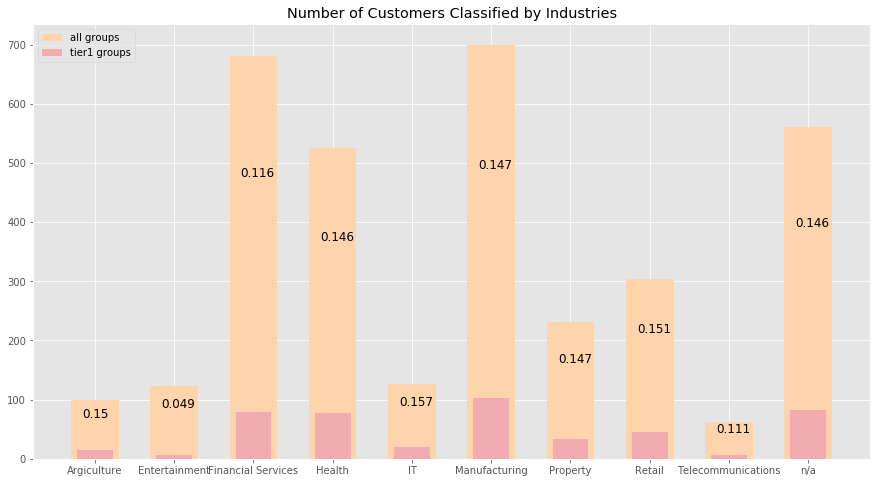

In [44]:
Comb2_t1_industry = Comb2_t1.groupby(by=["job_industry_category"])["customer_id"].count().reset_index()
industry_count = Comb.groupby(by=["job_industry_category"])["customer_id"].count().reset_index()

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")
bar_width = 0.4
c = list(industry_count["job_industry_category"])

def percentlabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.08, 0.7*height, '%s' % int(height), size=10)

index = list(range(int(len(industry_count))))
cm1 = plt.bar([i for i in index], industry_count["customer_id"], 
        width=0.6, color=c_list[0], label="all groups")
# autolabel(cm)
cm2 = plt.bar([i for i in index], Comb2_t1_industry["customer_id"], 
        width=0.45, color=c_list[1], label="tier1 groups")
# print(cm1[0].get_height)
# print(cm2[0].get_height)
for x in index:
    height1 = cm1[x].get_height()
    height2 = cm2[x].get_height()
    plt.text(cm1[x].get_x()+cm1[x].get_width()/2.-0.16, 0.7*height1, '%s' % round(height2/height1,3), 
             size=12)
plt.legend(loc="upper left")
plt.xticks(index,c)
# plt.xlim(2000,3000)
plt.title("Number of Customers Classified by Industries")

In [45]:
Comb2_t2 = Comb2[Comb2["RFM"].isin([232, 234, 312, 322, 433, 112, 211, 212, 233, 244, 334, 444])]
print("average year:"+str(Comb2_t2["age"].mean()))
print("female rate:"+str(Comb2_t2[Comb2_t2["gender"]=="F"]["gender"].count()/len(Comb2_t2)))
print("male rate:"+str(Comb2_t2[Comb2_t2["gender"]=="M"]["gender"].count()/len(Comb2_t2)))
Comb2_t2.groupby(by=["age_group"])["customer_id"].count().reset_index()


average year:44.45169491525424
female rate:0.518644067797
male rate:0.481355932203


,age_group,customer_id
0,10-29,180
1,30-39,225
2,40-49,404
3,50-59,194
4,60-69,176
5,70 and above,1


Text(0.5,1,'Number of Customers Classified by Industries')

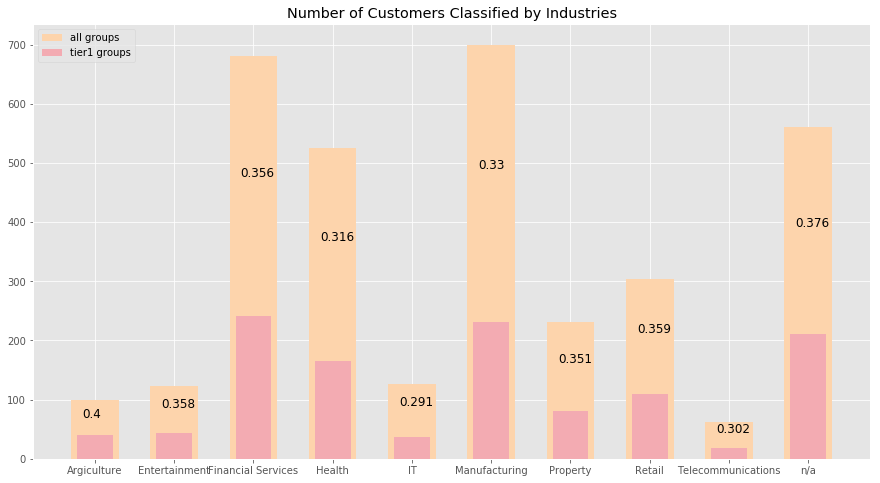

In [46]:
Comb2_t2_industry = Comb2_t2.groupby(by=["job_industry_category"])["customer_id"].count().reset_index()

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use("ggplot")
bar_width = 0.4
c = list(industry_count["job_industry_category"])

def percentlabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.08, 0.7*height, '%s' % int(height), size=10)

index = list(range(int(len(industry_count))))
cm1 = plt.bar([i for i in index], industry_count["customer_id"], 
        width=0.6, color=c_list[0], label="all groups")
# autolabel(cm)
cm2 = plt.bar([i for i in index], Comb2_t2_industry["customer_id"], 
        width=0.45, color=c_list[1], label="tier1 groups")
# print(cm1[0].get_height)
# print(cm2[0].get_height)
for x in index:
    height1 = cm1[x].get_height()
    height2 = cm2[x].get_height()
    plt.text(cm1[x].get_x()+cm1[x].get_width()/2.-0.16, 0.7*height1, '%s' % round(height2/height1,3), 
             size=12)
plt.legend(loc="upper left")
plt.xticks(index,c)
# plt.xlim(2000,3000)
plt.title("Number of Customers Classified by Industries")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


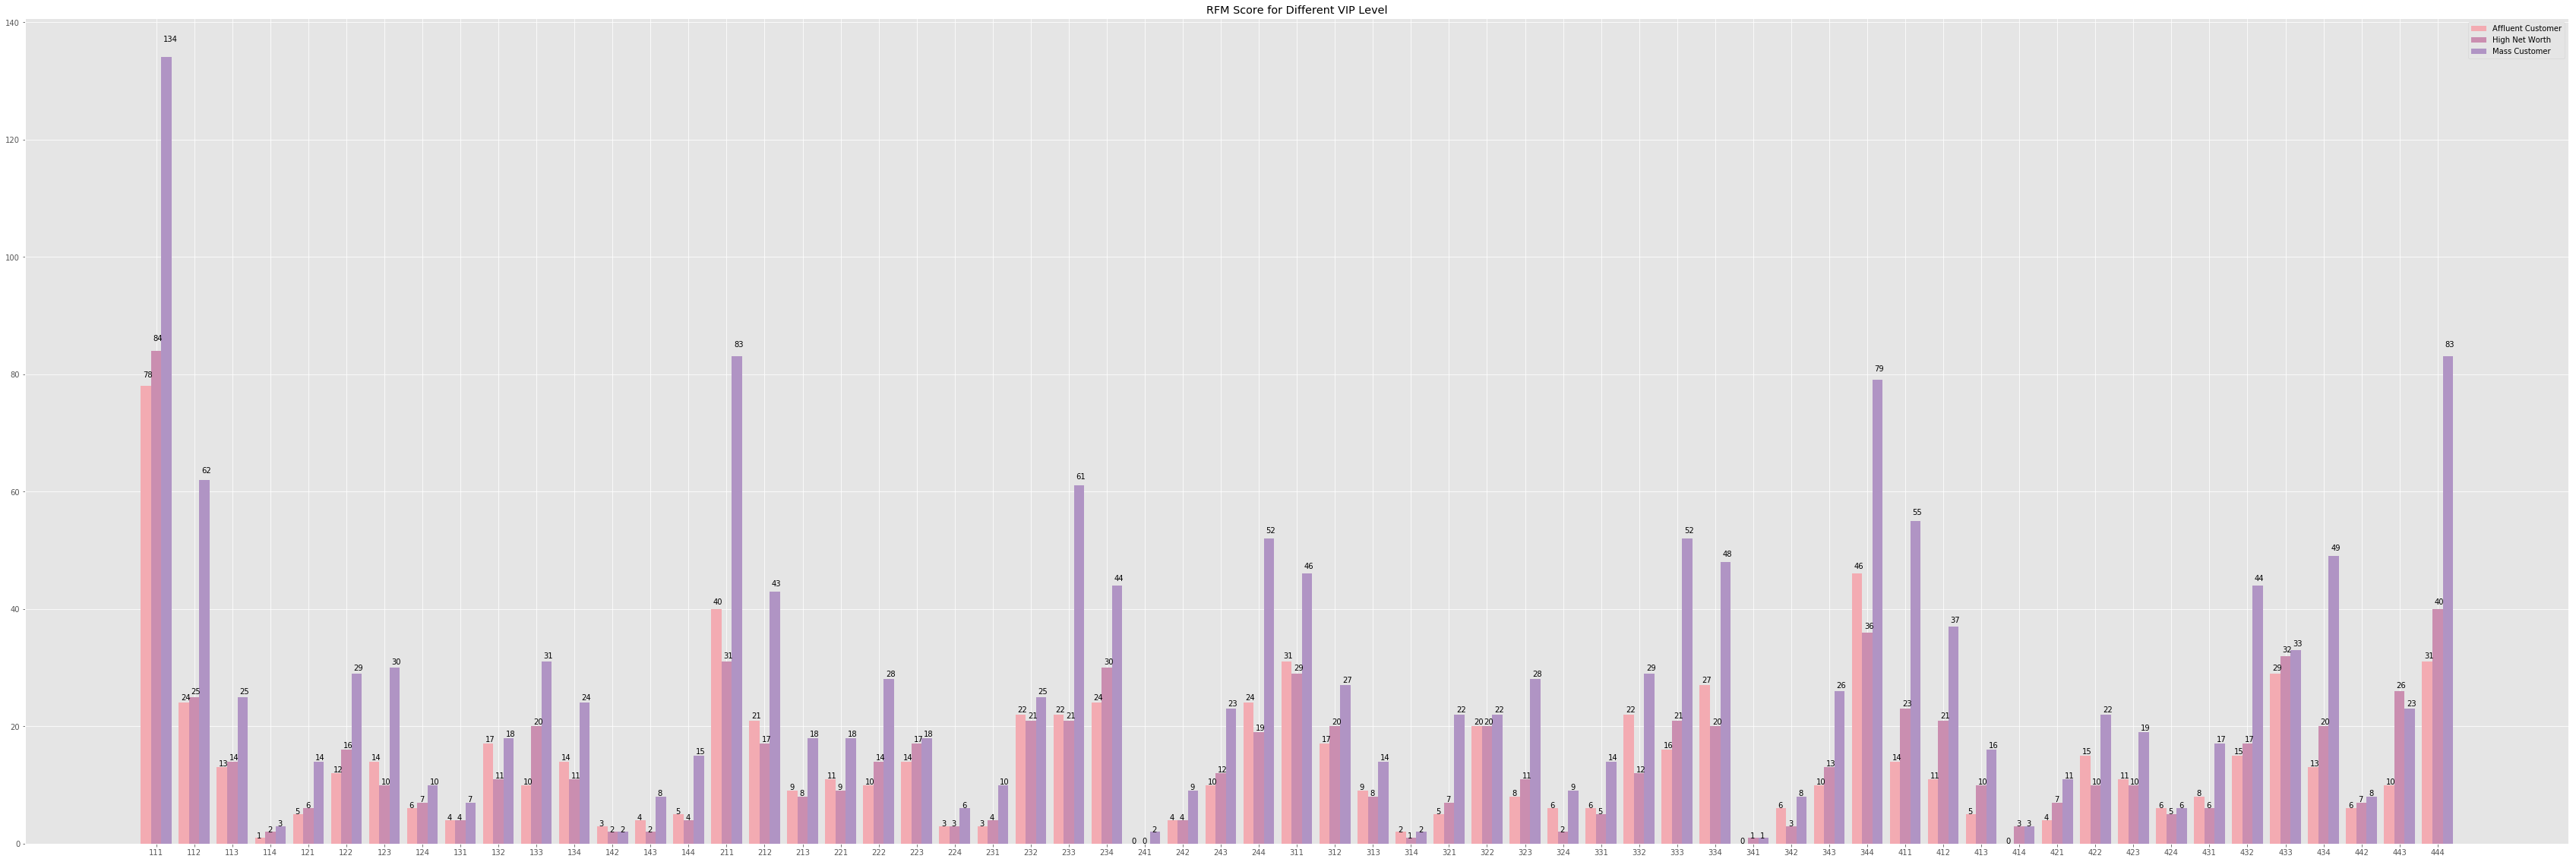

In [52]:
RFM_check = pd.read_excel("KPMG_RFM.xls")

# %matplotlib inline
plt.figure(figsize=(60,20))
plt.style.use("ggplot")
bar_width = 0.27
d = list(RFM_check["RFM"].unique())

index = list(range(int(len(RFM_check)/3)))
print(index)
cm = plt.bar([i-bar_width for i in index], RFM_check[RFM_check["wealth_segment"]=="Affluent Customer"]["customer_id"], width=bar_width, color=c_list[1], label="Affluent Customer")
autolabel(cm)
cm = plt.bar([i for i in index], RFM_check[RFM_check["wealth_segment"]=="High Net Worth"]["customer_id"], width=bar_width, color=c_list[2], label="High Net Worth")
autolabel(cm)
cm = plt.bar([i+bar_width for i in index], RFM_check[RFM_check["wealth_segment"]=="Mass Customer"]["customer_id"], width=bar_width, color=c_list[3], label="Mass Customer")
autolabel(cm)
plt.legend(loc="upper right")
plt.xticks(index,d)
# plt.xlim(111,444)
plt.title("RFM Score for Different VIP Level")
plt.savefig("RFM Score for Different VIP Level.png")